In [2]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 3. Load the dataset
# Update the path according to your Google Drive folder structure
file_path = 'loan.csv'
df = pd.read_csv(file_path, low_memory=False)

# 4. Quick check
print(df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(2260668, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 2. Data Exploration
print("Dataset Shape:", df.shape)

Dataset Shape: (2260668, 145)


In [4]:
print("\nColumn Types:\n", df.dtypes.value_counts())


Column Types:
 float64    105
object      36
int64        4
Name: count, dtype: int64


In [5]:
print("\nSample Data:\n", df.head())


Sample Data:
    id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0     13.56        84.92     C        C1  ...                            NaN   
1     18.94       777.23     D        D2  ...                            NaN   
2     17.97       180.69     D        D1  ...                            NaN   
3     18.94       146.51     D        D2  ...                            NaN   
4     16.14       731.78     C        C4  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settleme


Missing Values Per Column:
 id                                            2260668
member_id                                     2260668
url                                           2260668
orig_projected_additional_accrued_interest    2252242
hardship_loan_status                          2250055
                                               ...   
acc_now_delinq                                     29
earliest_cr_line                                   29
delinq_amnt                                        29
annual_inc                                          4
zip_code                                            1
Length: 113, dtype: int64


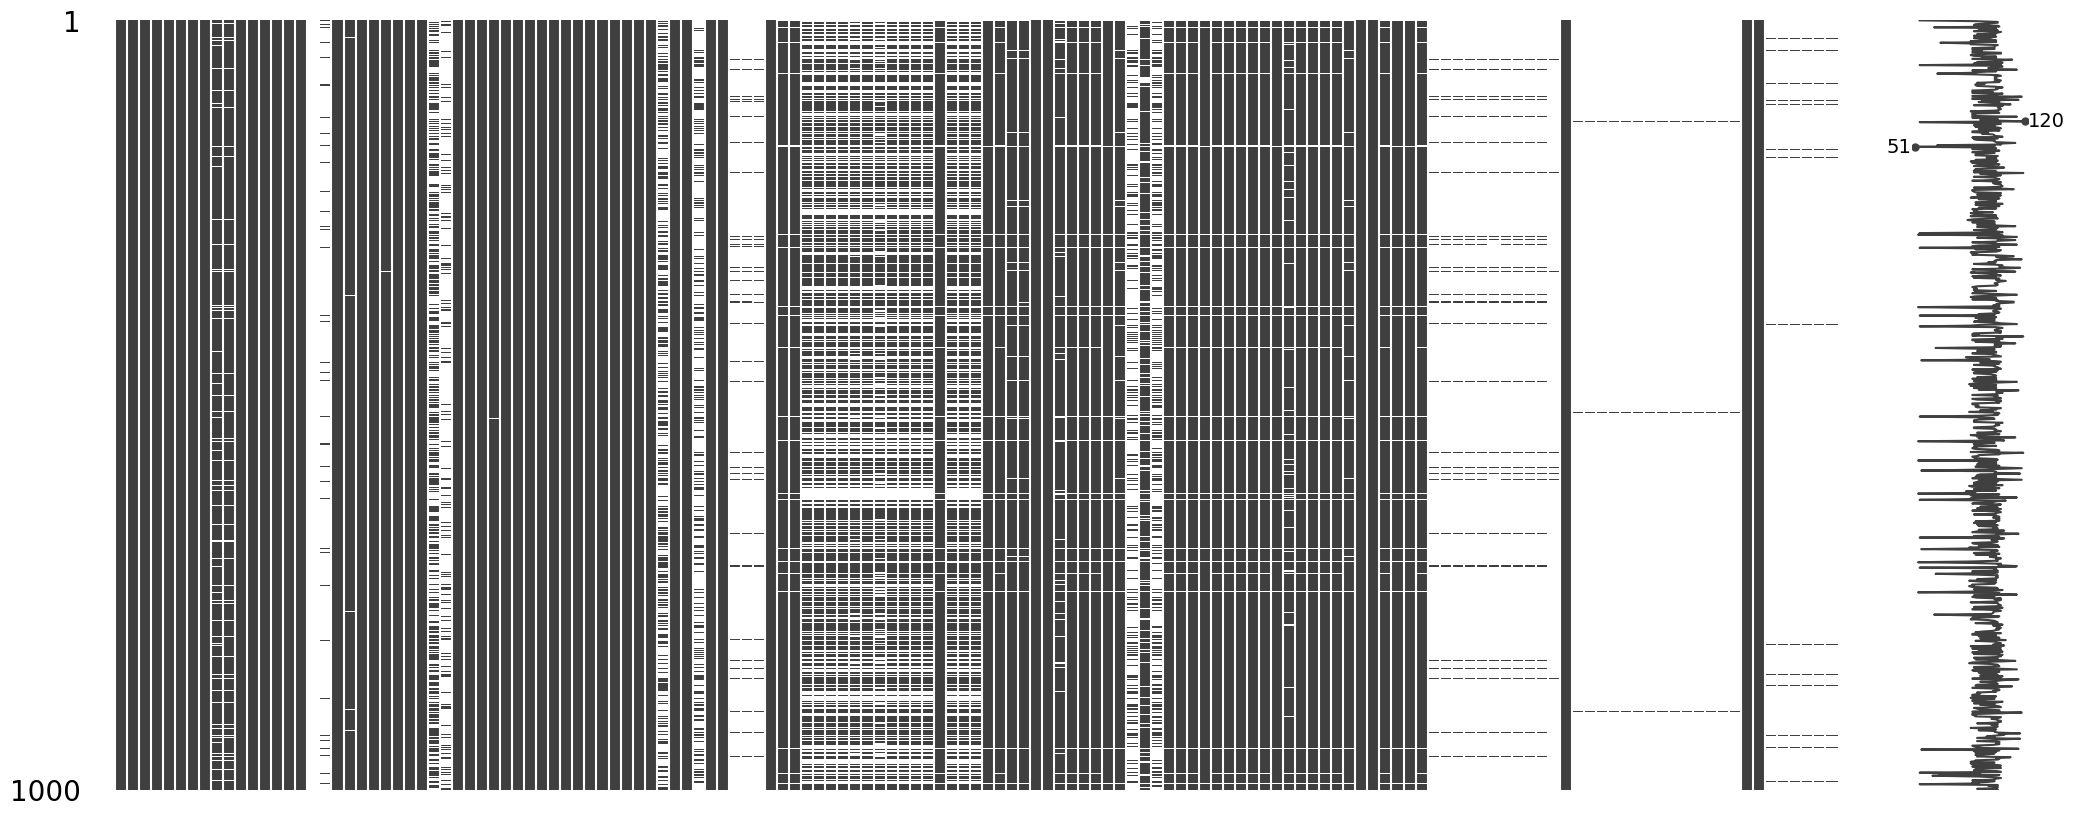

In [6]:

# 3. Data Cleaning: Check and remove columns with high missing values
missing = df.isnull().sum()
print("\nMissing Values Per Column:\n", missing[missing > 0].sort_values(ascending=False))

# Visualize missingness
msno.matrix(df.sample(1000))
plt.show()

In [7]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df_clean = df.dropna(thresh=threshold, axis=1)

# Drop rows with remaining missing values
df_clean = df_clean.dropna()

print("\nRemaining Missing Values After Cleaning:", df_clean.isnull().sum().sum())
print("New Shape:", df_clean.shape)


Remaining Missing Values After Cleaning: 0
New Shape: (917472, 101)


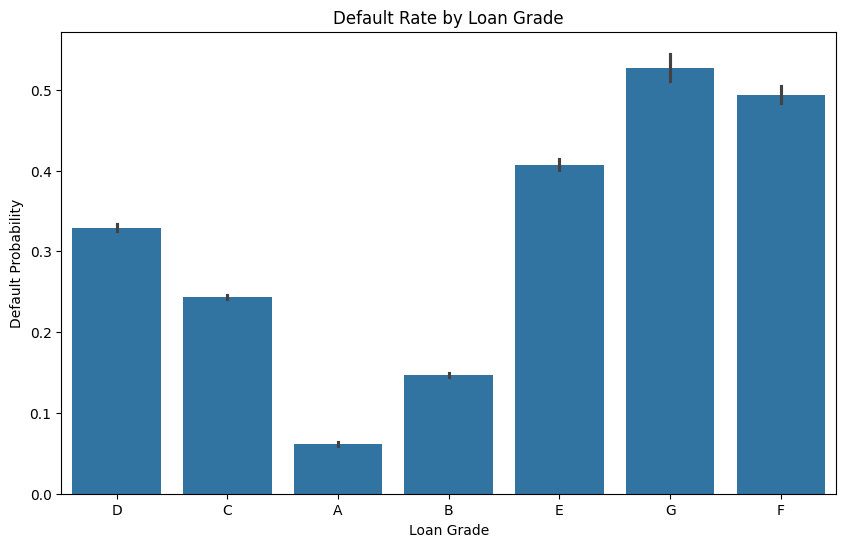

In [8]:
# 4. Exploratory Data Analysis (EDA)
# Convert target to binary for analysis (e.g., Fully Paid vs Charged Off)
df_clean = df_clean[df_clean['loan_status'].isin(['Fully Paid', 'Charged Off'])]
df_clean['loan_status'] = df_clean['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

# A: Default rate by grade
plt.figure(figsize=(10, 6))
sns.barplot(data=df_clean, x='grade', y='loan_status')
plt.title('Default Rate by Loan Grade')
plt.ylabel('Default Probability')
plt.xlabel('Loan Grade')
plt.show()

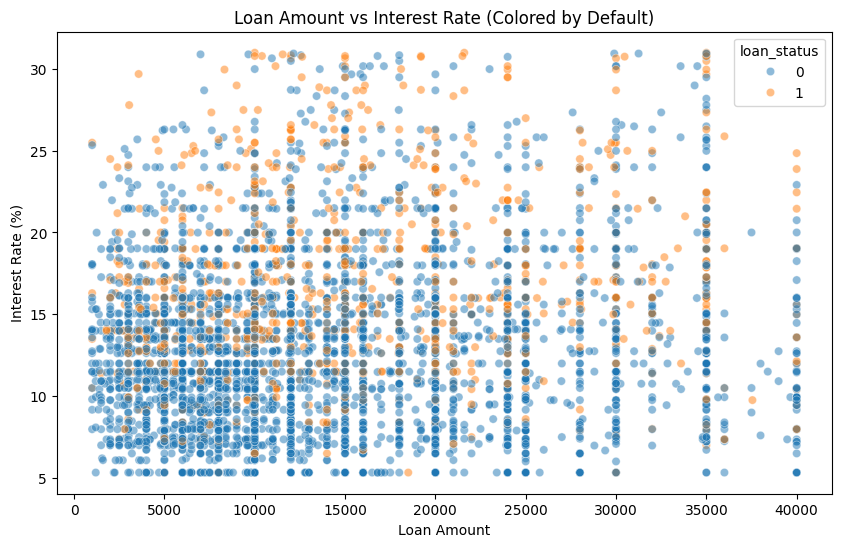

In [9]:
# B: Loan amount vs Interest rate scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean.sample(5000), x='loan_amnt', y='int_rate', hue='loan_status', alpha=0.5)
plt.title('Loan Amount vs Interest Rate (Colored by Default)')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate (%)')
plt.show()

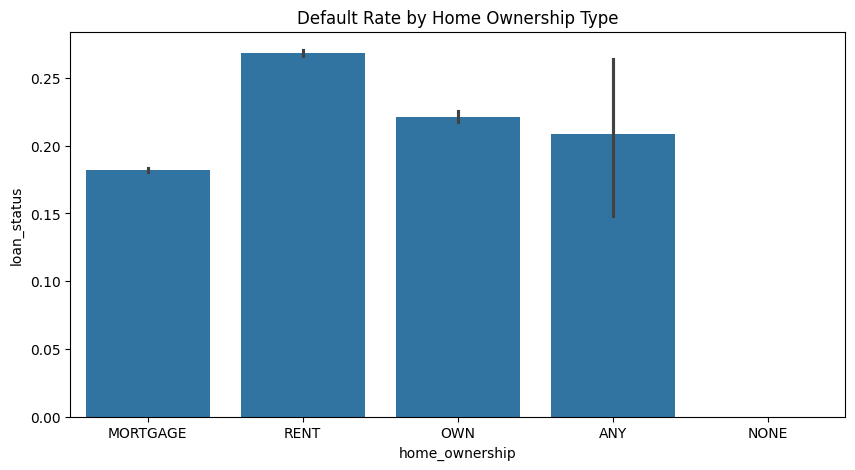

In [10]:
# C: Home ownership vs default rate
plt.figure(figsize=(10, 5))
sns.barplot(data=df_clean, x='home_ownership', y='loan_status')
plt.title('Default Rate by Home Ownership Type')
plt.show()

In [11]:
# D: Summary table - average income by loan status
summary_table = df_clean.groupby('loan_status')['annual_inc'].agg(['count', 'mean', 'median', 'max', 'min']).rename(index={0: 'Fully Paid', 1: 'Charged Off'})
print("\nIncome Summary by Loan Status:\n", summary_table)


Income Summary by Loan Status:
               count          mean   median         max     min
loan_status                                                   
Fully Paid   263457  83891.417408  70000.0  10999200.0   100.0
Charged Off   73951  76134.955495  65000.0   6500000.0  2400.0


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [13]:
# Filter binary target
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

# Drop columns with >50% missing
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Drop rows with any missing
df = df.dropna()

# Remove known leakage columns
leaky_cols = [
    'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
    'collection_recovery_fee', 'last_pymnt_amnt', 'last_pymnt_d',
    'next_pymnt_d', 'last_credit_pull_d', 'hardship_flag',
    'settlement_status', 'debt_settlement_flag', 'disbursement_method'
]
df = df.drop(columns=[col for col in leaky_cols if col in df.columns])

# Drop irrelevant ID cols
drop_cols = ['id', 'member_id', 'url', 'emp_title', 'title', 'zip_code']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

In [14]:
df_sample = df.sample(frac=0.1, random_state=42).reset_index(drop=True)

In [15]:
import warnings, numpy as np, pandas as pd
warnings.filterwarnings("ignore")
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split

X = df_sample.drop(columns=['loan_status'])
y = df_sample['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# -------------------------------
# Feature engineering transformer
# -------------------------------
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, rare_thresh=0.01):
        self.rare_thresh = rare_thresh
        self.rare_maps_ = {}
    def fit(self, X, y=None):
        for c in X.select_dtypes(include="object").columns:
            vc = X[c].value_counts(normalize=True)
            self.rare_maps_[c] = set(vc[vc < self.rare_thresh].index)
        return self
    def transform(self, X):
        Xc = X.copy()
        # term -> months
        if 'term' in Xc.columns:
            Xc['term_months'] = Xc['term'].astype(str).str.extract(r'(\d+)').astype(float)
        # emp_length -> numeric
        if 'emp_length' in Xc.columns:
            s = Xc['emp_length'].astype(str).str.lower()
            def _emp_len(v):
                if '10+' in v: return 10.0
                if '<' in v: return 0.0
                digits = ''.join(ch for ch in v if ch.isdigit())
                return float(digits) if digits else np.nan
            Xc['emp_length_num'] = s.map(_emp_len)
        # revol_util -> numeric
        if 'revol_util' in Xc.columns and Xc['revol_util'].dtype == object:
            Xc['revol_util_num'] = (
                Xc['revol_util'].astype(str).str.rstrip('%').replace('nan', np.nan).astype(float)
            )
        # ratios
        if {'loan_amnt','annual_inc'}.issubset(Xc.columns):
            Xc['loan_to_income'] = Xc['loan_amnt'] / (Xc['annual_inc'].replace(0, np.nan) + 1e-6)
        if {'installment','annual_inc'}.issubset(Xc.columns):
            Xc['installment_to_income'] = Xc['installment'] / (Xc['annual_inc'].replace(0, np.nan) + 1e-6)
        # credit length (years)
        if 'earliest_cr_line' in Xc.columns:
            ec = pd.to_datetime(Xc['earliest_cr_line'], errors='coerce')
            idt = pd.to_datetime(Xc['issue_d'], errors='coerce') if 'issue_d' in Xc.columns else pd.Timestamp('2017-01-01')
            Xc['credit_length_years'] = ((idt - ec).dt.days / 365.25).astype(float)
        # rare-category grouping
        for c in Xc.select_dtypes(include="object").columns:
            rares = self.rare_maps_.get(c, set())
            if rares:
                Xc[c] = Xc[c].apply(lambda v: 'Other' if v in rares else v)
        # fill numeric NaNs
        num_cols = Xc.select_dtypes(include=['int64','float64']).columns
        if len(num_cols):
            Xc[num_cols] = Xc[num_cols].fillna(Xc[num_cols].median())
        return Xc

# -------------------------------
# Preprocessor
# -------------------------------
def make_preprocessor():
    return ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), selector(dtype_include=['int64','float64'])),
            ("cat", OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False),
             selector(dtype_include=['object']))
        ],
        remainder='drop'
    )

# -------------------------------
# Define one sampler + 4 models
# -------------------------------
sampler = RandomUnderSampler(random_state=42)
models = {
    "LogReg": LogisticRegression(max_iter=2000, n_jobs=None),
    "RandomForest": RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(
        n_estimators=500, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8,
        reg_lambda=1.0, eval_metric='logloss',
        n_jobs=-1, tree_method='hist'
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=500, learning_rate=0.05, num_leaves=31,
        subsample=0.8, colsample_bytree=0.8,
        random_state=42, n_jobs=-1
    )
}

# -------------------------------
# Run evaluation
# -------------------------------
# This loop was commented out and needs to be uncommented to define 'clf'
for model_name, model in models.items():
    print(f"\n===== Model: {model_name} =====")
    clf = ImbPipeline(steps=[
        ("feat", FeatureEngineer(rare_thresh=0.01)),
        ("pre", make_preprocessor()),
        ("sampler", sampler),
        ("clf", model)
    ])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, digits=3))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 6))


===== Model: LogReg =====
Confusion Matrix:
 [[14971   316]
 [  290  3529]]
Classification Report:
               precision    recall  f1-score   support

           0      0.981     0.979     0.980     15287
           1      0.918     0.924     0.921      3819

    accuracy                          0.968     19106
   macro avg      0.949     0.952     0.951     19106
weighted avg      0.968     0.968     0.968     19106

ROC-AUC: 0.979912

===== Model: RandomForest =====
Confusion Matrix:
 [[15088   199]
 [  436  3383]]
Classification Report:
               precision    recall  f1-score   support

           0      0.972     0.987     0.979     15287
           1      0.944     0.886     0.914      3819

    accuracy                          0.967     19106
   macro avg      0.958     0.936     0.947     19106
weighted avg      0.966     0.967     0.966     19106

ROC-AUC: 0.976744

===== Model: XGBoost =====
Confusion Matrix:
 [[15175   112]
 [  271  3548]]
Classification Report:
 

In [16]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [17]:
# ===== place ONCE (above the loop) =====
import shap, numpy as np
shap.initjs()


 99%|===================| 4968/5000 [02:37<00:01]       

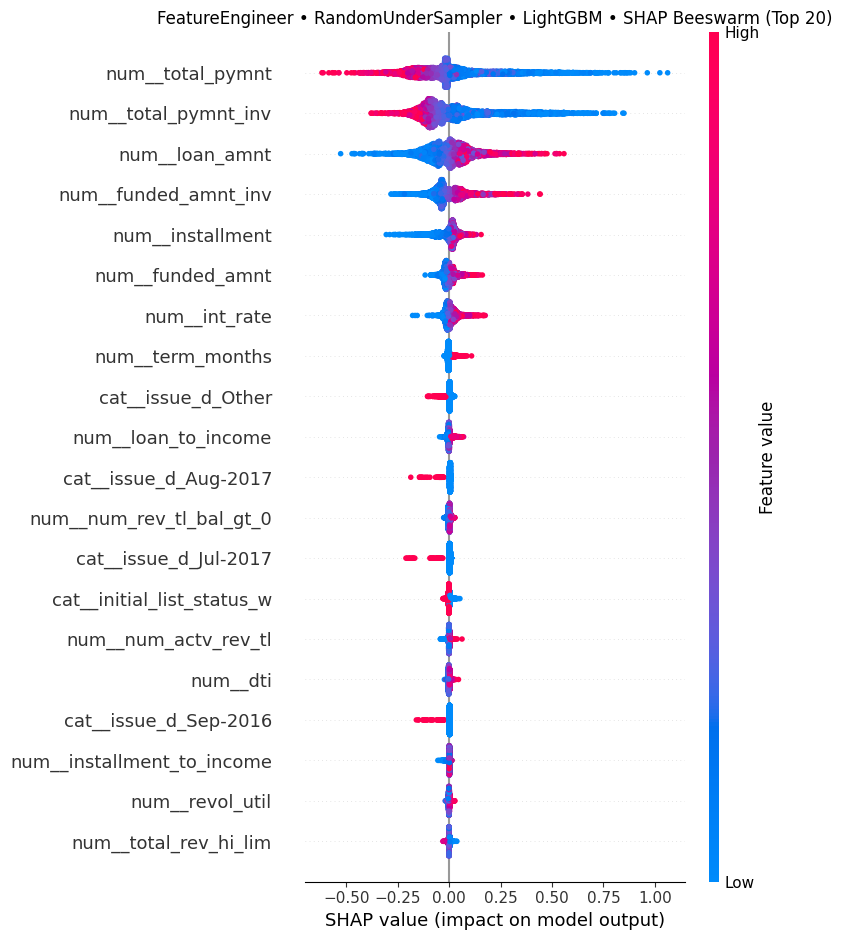

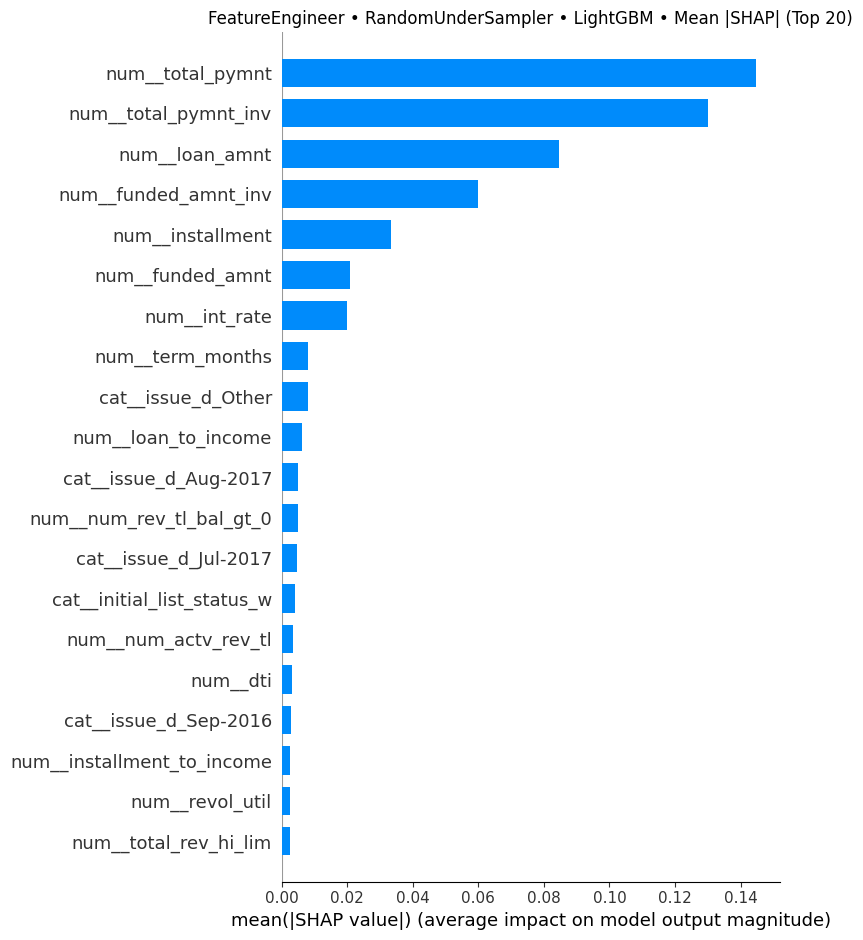

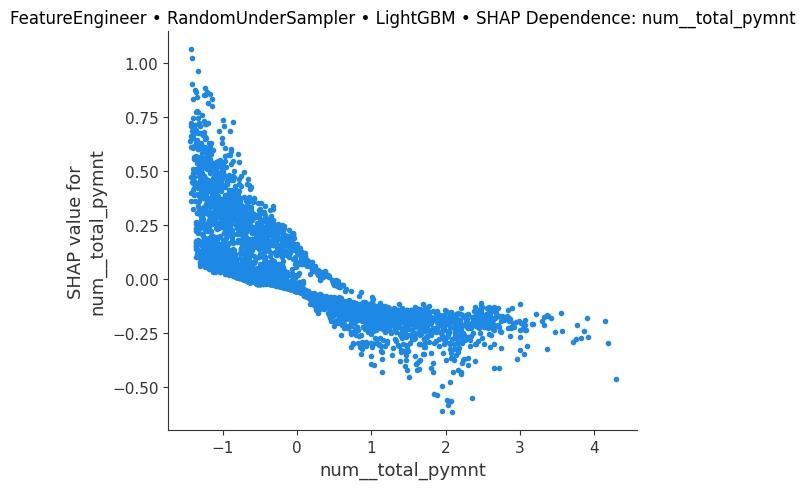

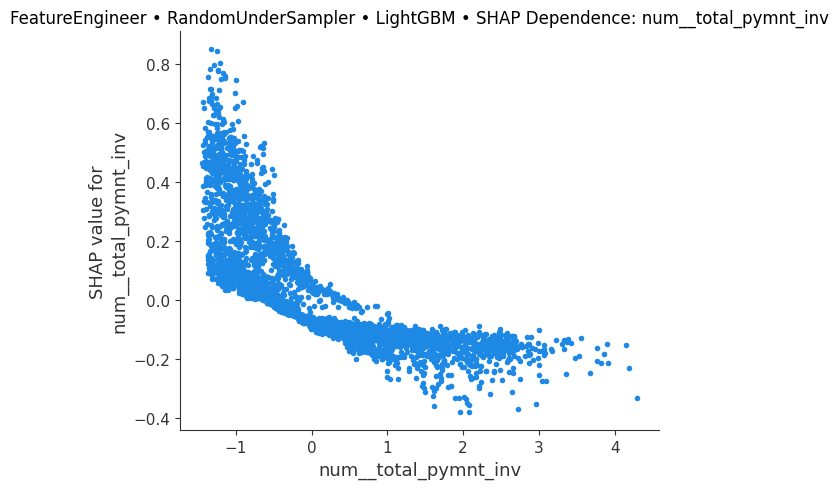

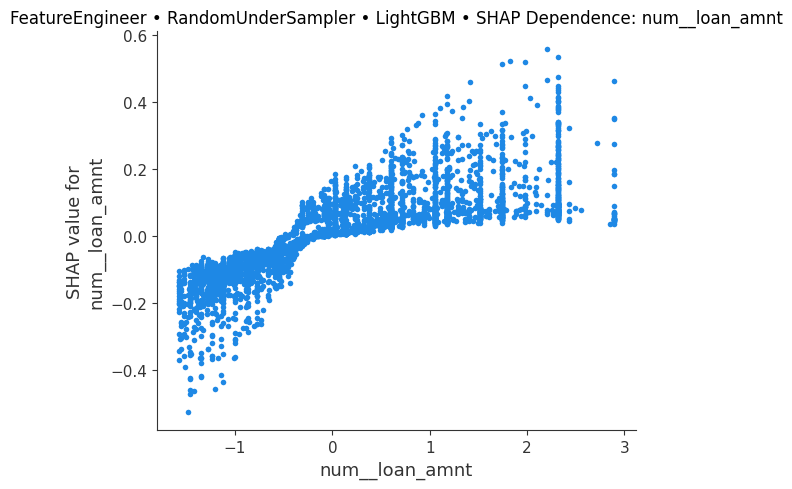

In [18]:
# ===== SHAP: use the SAME fitted steps as the pipeline =====
import shap
from scipy import sparse

# 1) Get fitted steps
feat = clf.named_steps.get('feat')          # FeatureEngineer or identity FunctionTransformer
pre  = clf.named_steps['pre']               # ColumnTransformer
est  = clf.named_steps['clf']               # Final estimator
sampler_step = clf.named_steps.get('sampler') # Sampler step

# Define fe_name and sampler_name
fe_name = type(feat).__name__ if feat is not None else "No Feature Engineering"
sampler_name = type(sampler_step).__name__ if sampler_step is not None else "No Sampling"


# 2) Apply feature engineering BEFORE preprocessing
X_train_fe = feat.transform(X_train) if feat is not None else X_train
X_test_fe  = feat.transform(X_test)  if feat is not None else X_test

# 3) Apply the fitted preprocessor
X_train_enc = pre.transform(X_train_fe)
X_test_enc  = pre.transform(X_test_fe)

# 4) Handle sparse -> dense for SHAP plots if needed
if sparse.issparse(X_train_enc):
    X_train_enc = X_train_enc.toarray()
if sparse.issparse(X_test_enc):
    X_test_enc = X_test_enc.toarray()

# 5) Feature names (robust across sklearn versions)
try:
    feature_names = pre.get_feature_names_out().tolist()
except Exception:
    # Fallback: try to compose names manually
    num_names, cat_names = [], []
    if hasattr(pre, "transformers_"):
        for step_name, trans, cols in pre.transformers_:
            if step_name == "num":
                # cols may be a list or a selector; try best-effort
                try:
                    num_names = list(cols)
                except Exception:
                    num_names = [f"num_{i}" for i in range(
                        pre.named_transformers_['num'].n_features_in_
                    )]
            elif step_name == "cat":
                if hasattr(trans, "get_feature_names_out"):
                    try:
                        cat_names = trans.get_feature_names_out(cols).tolist()
                    except Exception:
                        cat_names = trans.get_feature_names_out().tolist()
                else:
                    try:
                        cat_names = list(cols)
                    except Exception:
                        cat_names = [f"cat_{i}"]
    feature_names = (num_names + cat_names) if (num_names or cat_names) else [f"f{i}" for i in range(X_test_enc.shape[1])]

# 6) Build DataFrames for SHAP visuals
X_train_df = pd.DataFrame(X_train_enc, columns=feature_names)
X_test_df  = pd.DataFrame(X_test_enc,  columns=feature_names)

# 7) Downsample for speed + background
X_test_plot = X_test_df.sample(min(5000, len(X_test_df)), random_state=42)
bg = X_train_df.sample(min(1000, len(X_train_df)), random_state=42)

# Helper for binary models returning list
def _to_mat(sv):
    return sv[1] if isinstance(sv, list) else sv

# 8) Choose explainer based on model type
try:
    if isinstance(est, LogisticRegression):
        explainer = shap.LinearExplainer(est, bg, feature_perturbation="interventional")
        shap_vals = explainer.shap_values(X_test_plot)
        shap_mat  = _to_mat(shap_vals)

    elif isinstance(est, (RandomForestClassifier, XGBClassifier, LGBMClassifier)):
        try:
            explainer = shap.TreeExplainer(
                est, data=bg, model_output="probability", feature_perturbation="interventional"
            )
            shap_vals = explainer.shap_values(X_test_plot, check_additivity=False)
        except Exception:
            explainer = shap.TreeExplainer(
                est, model_output="probability", feature_perturbation="tree_path_dependent"
            )
            shap_vals = explainer.shap_values(X_test_plot, check_additivity=False)
        shap_mat = _to_mat(shap_vals)

    else:
        f = lambda A: est.predict_proba(A)
        explainer = shap.KernelExplainer(f, bg, link="logit")
        shap_vals = explainer.shap_values(X_test_plot, nsamples=200)
        shap_mat  = _to_mat(shap_vals)

    # 9) Plots
    shap.summary_plot(shap_mat, X_test_plot, max_display=20, show=False)
    plt.title(f"{fe_name} • {sampler_name} • {model_name} • SHAP Beeswarm (Top 20)")
    plt.tight_layout(); plt.show()

    shap.summary_plot(shap_mat, X_test_plot, plot_type="bar", max_display=20, show=False)
    plt.title(f"{fe_name} • {sampler_name} • {model_name} • Mean |SHAP| (Top 20)")
    plt.tight_layout(); plt.show()

    # Dependence for top 3 features
    mean_abs = np.abs(shap_mat).mean(axis=0)
    top3_idx = np.argsort(mean_abs)[::-1][:3]
    for fcol in [X_test_plot.columns[i] for i in top3_idx]:
        shap.dependence_plot(fcol, shap_mat, X_test_plot, interaction_index=None, show=False)
        plt.title(f"{fe_name} • {sampler_name} • {model_name} • SHAP Dependence: {fcol}")
        plt.tight_layout(); plt.show()

except Exception as e:
    print(f"[SHAP skipped for {model_name} ({sampler_name}, {fe_name})] Reason: {e}")